<a href="https://colab.research.google.com/github/jeremysb1/predictive-analytics/blob/main/causal_impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Dates

In [1]:
#Install libraries
!pip install yfinance
!pip install tfcausalimpact

     |████████████████████████████████| 63 kB 505 kB/s 
     |████████████████████████████████| 6.4 MB 11.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 462 kB 6.5 MB/s 
  Created wheel for tfcausalimpact: filename=tfcausalimpact-0.0.9-py3-none-any.whl size=38366 sha256=900d0c11a3c19facef538e9870b57fec19c514fdf0a1d377546e2fdd

In [2]:
#Import libraries
import yfinance as yf
from causalimpact import CausalImpact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Define Dates
training_start = "2020-09-01"
training_end = "2020-10-19"
treatment_start = "2020-10-20"
treatment_end = "2020-10-23"
end_stock = "2020-10-24"

#Loading Financial Data

In [4]:
#Bitcoin Data
y = ["BTC-USD"]
y = yf.download(tickers = y, 
                start = training_start,
                end = end_stock,
                interval = "1d")
y = y['Adj Close'].rename("y")
y[:1]

[*********************100%***********************]  1 of 1 completed


Date
2020-09-01    11970.478516
Name: y, dtype: float64

In [5]:
#Load more stock data
stocks = ["CARL-B.CO", "ZAL.DE", "SQ", "CRSP", "TRMB", "JD", "DE", "KTOS", "GOOG"]
x = yf.download(tickers = stocks, start = training_start, end = end_stock, interval = "1d")
x.head()

[*********************100%***********************]  9 of 9 completed


Adj Close                                                 \
             CARL-B.CO       CRSP          DE         GOOG         JD   
Date                                                                    
2020-09-01  841.202209  93.419998  213.948563  1660.709961  82.489998   
2020-09-02  850.005493  93.930000  213.378555  1728.280029  83.209999   
2020-09-03  866.242615  85.690002  207.186783  1641.839966  79.040001   
2020-09-04  851.961731  82.019997  207.707703  1591.040039  80.000000   
2020-09-07  860.765015        NaN         NaN          NaN        NaN   

                                                              Close  ...  \
                 KTOS          SQ       TRMB     ZAL.DE   CARL-B.CO  ...   
Date                                                                 ...   
2020-09-01  19.700001  166.660004  53.410000  77.000000  860.000000  ...   
2020-09-02  19.910000  162.880005  54.310001  77.000000  869.000000  ...   
2020-09-03  19.520000  152.860001  50.900002  75.080002  885.599976  ...   
2020-09-04  19.260000  146.389999  49.959999  71.739998  871.000000  ...   
2020-09-07        NaN         NaN        NaN  74.000000  880.000000  ...   

                 Open    Volume                                               \
               ZAL.DE CARL-B.CO       CRSP         DE       GOOG          JD   
Date                                                                           
2020-09-01  74.959999    269532   779500.0  1873400.0  1825300.0  11431400.0   
2020-09-02  77.500000    202539   532000.0  1983000.0  2511200.0  13860900.0   
2020-09-03  77.260002    248867  1278900.0  1975200.0  3107800.0  19254000.0   
2020-09-04  74.800003    221091  1570300.0  1662300.0  2608600.0  21500900.0   
2020-09-07  72.239998     90498        NaN        NaN        NaN         NaN   

                                                      
                 KTOS          SQ       TRMB  ZAL.DE  
Date                                                  
2020-09-01   587600.0  12306400.0   542300.0  790198  
2020-09-02   612800.0  11214800.0   728800.0  496554  
2020-09-03   847100.0  16421200.0  1220300.0  736259  
2020-09-04  1060000.0  17995200.0   914700.0  662250  
2020-09-07        NaN         NaN        NaN  362062  

[5 rows x 54 columns]

In [6]:
#adjusted close
x = x.iloc[:, :len(stocks)]
x.head(1)

Adj Close                                                 \
             CARL-B.CO       CRSP          DE         GOOG         JD   
Date                                                                    
2020-09-01  841.202209  93.419998  213.948563  1660.709961  82.489998   

                                                 
                 KTOS          SQ   TRMB ZAL.DE  
Date                                             
2020-09-01  19.700001  166.660004  53.41   77.0

In [7]:
#removing unneeded level
x.columns = x.columns.droplevel()
x.head(1)

,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-09-01,841.202209,93.419998,213.948563,1660.709961,82.489998,19.700001,166.660004,53.41,77.0


In [8]:
#combine everything
df = pd.concat([y, x], axis = 1).dropna()
df.head()

,y,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-09-01,11970.478516,841.202209,93.419998,213.948563,1660.709961,82.489998,19.700001,166.660004,53.410000,77.000000
2020-09-02,11414.034180,850.005493,93.930000,213.378555,1728.280029,83.209999,19.910000,162.880005,54.310001,77.000000
2020-09-03,10245.296875,866.242615,85.690002,207.186783,1641.839966,79.040001,19.520000,152.860001,50.900002,75.080002
2020-09-04,10511.813477,851.961731,82.019997,207.707703,1591.040039,80.000000,19.260000,146.389999,49.959999,71.739998
2020-09-08,10131.516602,846.484192,81.459999,206.626617,1532.390015,76.220001,19.230000,139.110001,49.139999,73.440002


#Data Analysis

In [9]:
#Prepare dataframe with training data
df_training = df[df.index <= training_end]
df_training.tail()

,y,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-10-13,11425.899414,876.610962,103.059998,233.944138,1571.680054,82.610001,20.959999,190.470001,51.720001,85.820000
2020-10-14,11429.506836,871.133301,101.370003,235.176865,1568.079956,81.099998,21.010000,187.490005,50.540001,84.980003
2020-10-15,11495.349609,856.069946,99.889999,234.950073,1559.130005,80.250000,21.100000,188.600006,52.290001,84.419998
2020-10-16,11322.123047,848.831665,109.830002,236.744919,1573.010010,81.519997,20.790001,186.350006,52.340000,84.800003
2020-10-19,11742.037109,851.766113,107.720001,234.881027,1534.609985,80.610001,20.639999,186.960007,51.970001,85.000000


In [10]:
#Stationarity
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
test = adfuller(x = df_training.y)[1]
test
print(test)

0.09874703208822727


In [12]:
#if-else
if test < 0.05:
  print("The Time Series is stationary")
else:
  print("The Time Series is not stationary")

The Time Series is not stationary


In [13]:
#Differencing
differencing = df_training.pct_change().dropna()
differencing.head()

,y,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-09-02,-0.046485,0.010465,0.005459,-0.002664,0.040687,0.008728,0.010660,-0.022681,0.016851,0.000000
2020-09-03,-0.102395,0.019102,-0.087725,-0.029018,-0.050015,-0.050114,-0.019588,-0.061518,-0.062788,-0.024935
2020-09-04,0.026014,-0.016486,-0.042829,0.002514,-0.030941,0.012146,-0.013320,-0.042326,-0.018468,-0.044486
2020-09-08,-0.036178,-0.006429,-0.006828,-0.005205,-0.036863,-0.047250,-0.001558,-0.049730,-0.016413,0.023697
2020-09-09,0.010939,-0.003929,0.046526,0.025114,0.016034,0.012726,0.016641,0.036662,0.019740,-0.009804


In [14]:
#Adfuller on differenced data
test = adfuller(x = differencing.y)[1]
print(test)

if test < 0.05:
  print("The Time Series is stationary")
else:
  print("The Time Series is not stationary")

3.8054323617260893e-07
The Time Series is stationary


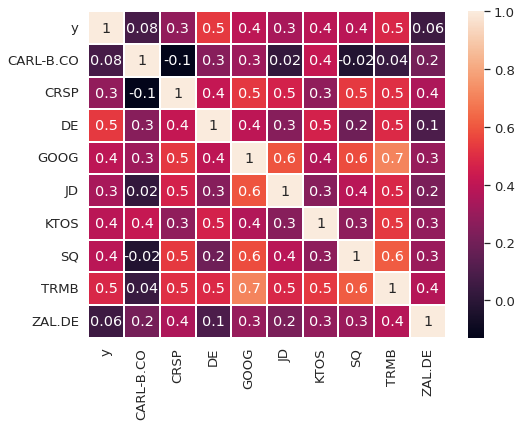

In [15]:
#Correlation Matrix
plt.figure(figsize = (8, 6))
sns.set(font_scale=1.2)
sns.heatmap(differencing.corr(), 
            annot = True,
            fmt = '.1g',
            linewidths = 1,
            linecolor = 'white')

#Causal Impact

In [16]:
#prepare the dataset
df_final = df.drop(columns = ["CARL-B.CO", "ZAL.DE"])
df_final.head(1)

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB
Date,,,,,,,,
2020-09-01,11970.478516,93.419998,213.948563,1660.709961,82.489998,19.700001,166.660004,53.41


In [17]:
#Prepare for pre and post period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
Do not call `graph_parents`.
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


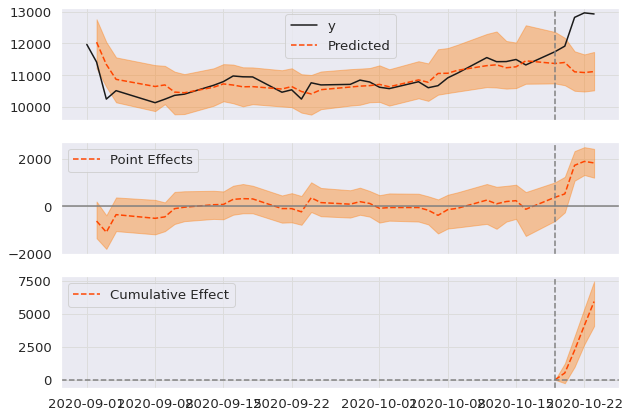

In [18]:
#Causal Impact
impact = CausalImpact(data = df_final, pre_period = pre_period, post_period = post_period)
impact.plot()

In [19]:
#summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    12659.36           50637.45
Prediction (s.d.)         11175.95 (211.99)  44703.81 (847.96)
95% CI                    [10793.32, 11624.31][43173.28, 46497.22]

Absolute effect (s.d.)    1483.41 (211.99)   5933.64 (847.96)
95% CI                    [1035.06, 1866.04] [4140.23, 7464.18]

Relative effect (s.d.)    13.27% (1.9%)      13.27% (1.9%)
95% CI                    [9.26%, 16.7%]     [9.26%, 16.7%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [20]:
print(impact.summary('report'))


Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 12659.36. By contrast, in the absence of an
intervention, we would have expected an average response of 11175.95.
The 95% interval of this counterfactual prediction is [10793.32, 11624.31].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1483.41 with a 95% interval of
[1035.06, 1866.04]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 50637.45.
By contrast, had the intervention not taken place, we would have expected
a sum of 44703.81. The 95% interval of this prediction is [43173.28, 46497.22].


The above results are given in terms of absolute numbers. In relative
